In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the dataset from the file Ecommerce.csv

In [2]:
df = pd.read_csv('Ecommerce.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [5]:
df = df.drop(['Email', 'Address', 'Avatar'], axis = 1)
df 

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [6]:
y = df['Yearly Amount Spent']
X = df.drop(['Yearly Amount Spent'], axis = 1)
y = df.drop(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership' ], axis = 1)
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


### Leave only one feature that has a linear relationship with the target variable.

Text(25.22222222222222, 0.5, 'Length of Membership')

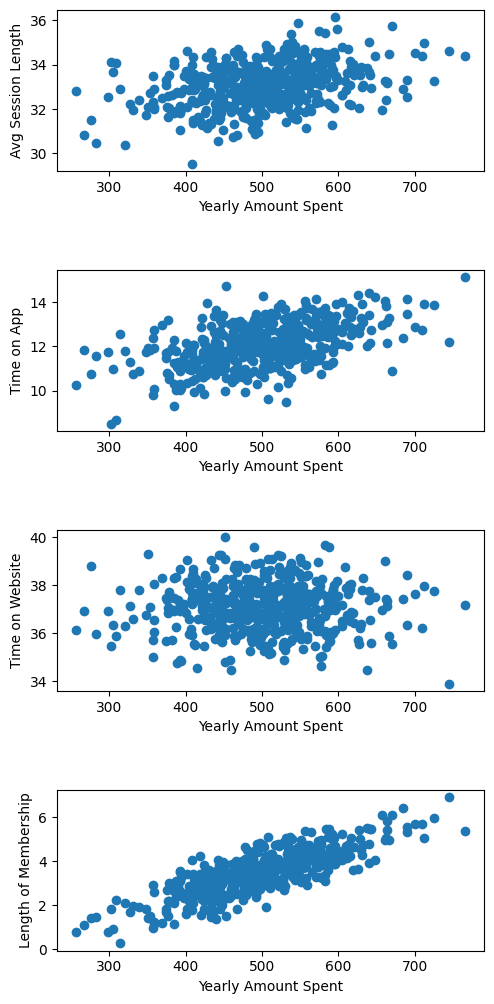

In [7]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Yearly Amount Spent'], df['Avg Session Length'])
axs[0].set_xlabel('Yearly Amount Spent')
axs[0].set_ylabel('Avg Session Length')

axs[1].scatter(df['Yearly Amount Spent'], df['Time on App'])
axs[1].set_xlabel('Yearly Amount Spent')
axs[1].set_ylabel('Time on App')

axs[2].scatter(df['Yearly Amount Spent'], df['Time on Website'])
axs[2].set_xlabel('Yearly Amount Spent')
axs[2].set_ylabel('Time on Website')

axs[3].scatter(df['Yearly Amount Spent'], df['Length of Membership'])
axs[3].set_xlabel('Yearly Amount Spent')
axs[3].set_ylabel('Length of Membership')


In [8]:
X = X.drop(['Avg Session Length', 'Time on App', 'Time on Website',], axis = 1)
X

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


### Divide the dataset into training and test sets with the ratio 80:20.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(400, 1) (400, 1)
(100, 1) (100, 1)


In [18]:
X_test.columns[0]

'Length of Membership'

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [12]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    #TODO
    
    X = np.concatenate((np.ones((data_vector.shape[0], 1)), data_vector), axis=1)
    X_T = X.T
    XTX = np.dot(X_T, X)
    XTX_inv = np.linalg.inv(XTX)
    XTX_inv_XT = np.dot(XTX_inv, X_T)
    betas = np.dot(XTX_inv_XT, response_vector)
    
    return betas

In [13]:
fit_1d_linear_regression(X_train, y_train)

array([[272.57786489],
       [ 64.06180589]])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [26]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    plt.scatter(x, y)
    
    x_range = np.linspace(np.min(x), np.max(x), 100)
    y_range = b0 + b1*x_range
    plt.plot(x_range, y_range, c='r')
    
    plt.xlabel(x.columns[0])
    plt.ylabel(y.columns[0])
    plt.title("Regression line \"{}\" vs \"{}\" ".format(y.columns[0], x.columns[0]))
    plt.savefig('Levon.png')

In [27]:
betas = fit_1d_linear_regression(X_train, y_train)

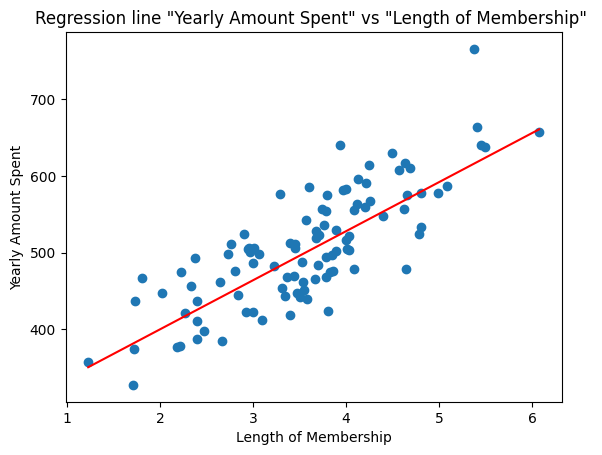

In [28]:
plot_fitted_line(betas[0], betas[1], X_test, y_test)

### Plot example

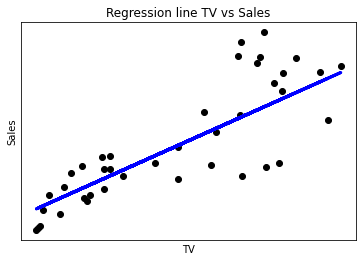

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [32]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('b0:', lr.intercept_[0])
print('b1:', lr.coef_[0][0])

b0: 271.89924003098815
b1: 63.97671122494865


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [47]:
X_test_added_ones = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

y_pred_mof = np.dot(X_test_added_ones, fit_1d_linear_regression(X_train, y_train))

mae_mof = mean_absolute_error(y_test, y_pred_mof)
mse_mof = mean_squared_error(y_test, y_pred_mof)
rmse_mof = np.sqrt(mse_mof)
r2_mof = r2_score(y_test, y_pred_mof)

print('mae_mof', mae_mof)
print('mse_mof', mse_mof)
print('rmse_mof', rmse_mof)
print('r2_mof', r2_mof)


mae_mof 38.24954122329306
mse_mof 2130.2760645817307
rmse_mof 46.15491376421075
r2_mof 0.6317520852375559


In [49]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae', mae)
print('mse', mse)
print('rmse', rmse)
print('r2', r2)

mae 38.249541223292994
mse 2130.276064581722
rmse 46.154913764210654
r2 0.6317520852375573


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [53]:
df.columns

Index(['Avg Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [54]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [57]:
X = df.drop(['Yearly Amount Spent'], axis = 1)
y = df.drop(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership' ], axis = 1)

In [58]:
X.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [59]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(400, 4) (400, 1)
(100, 4) (100, 1)


In [61]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('b0:', lr.intercept_[0])
print('b1:', lr.coef_[0][0])

b0: -1048.209832116301
b1: 25.589501300347976


In [62]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae', mae)
print('mse', mse)
print('rmse', rmse)
print('r2', r2)

mae 7.7434014287772825
mse 103.55023916441381
rmse 10.175963795356871
r2 0.9853774142242057


### Implement K-fold Cross Validation

### Evaluate model with K-fold